In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('yong_Data.csv')
data

,E,F,L,A,dL,materials,mat
0,0.054,37189,6,6258,660.292603,고무,1
1,0.090,38279,9,6802,562.760953,고무,1
2,0.099,13264,7,5257,178.401861,고무,1
3,0.059,23816,3,8580,141.140216,고무,1
4,0.091,28031,7,8606,250.549706,고무,1
...,...,...,...,...,...,...,...
39995,69.000,38222,8,958,4.625821,알루미늄,4
39996,69.000,34835,8,8424,0.479445,알루미늄,4
39997,69.000,28893,5,5922,0.353545,알루미늄,4
39998,69.000,8928,4,7103,0.072866,알루미늄,4


In [2]:
data = pd.concat([data.iloc[:,:5],pd.get_dummies(data['materials'])],axis = 1)

In [3]:
data

,E,F,L,A,dL,고무,나무,알루미늄,유리
0,0.054,37189,6,6258,660.292603,1,0,0,0
1,0.090,38279,9,6802,562.760953,1,0,0,0
2,0.099,13264,7,5257,178.401861,1,0,0,0
3,0.059,23816,3,8580,141.140216,1,0,0,0
4,0.091,28031,7,8606,250.549706,1,0,0,0
...,...,...,...,...,...,...,...,...,...
39995,69.000,38222,8,958,4.625821,0,0,1,0
39996,69.000,34835,8,8424,0.479445,0,0,1,0
39997,69.000,28893,5,5922,0.353545,0,0,1,0
39998,69.000,8928,4,7103,0.072866,0,0,1,0


In [4]:
# train 80 test 20
train =[]
test = []
for i in range(4):
    train.append(data[i*10000:i*10000+8000])
    test.append(data[i*10000+8000:i*10000+10000])

In [5]:
train = pd.concat(train)
test = pd.concat(test)

In [6]:
train_data = np.asarray( train.iloc[:,1:5])
train_label = np.asarray( train.iloc[:,5:])
test_data = np.asarray( test.iloc[:,1:5])
test_label = np.asarray( test.iloc[:,5:])

In [7]:
from keras import layers,models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(4,)))
# model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_data,train_label,epochs=500,batch_size = 1000, validation_split=0.3,shuffle=True)

Epoch 1/500
23/23 [==============================] - 0s 10ms/step - loss: 2728.4961 - accuracy: 0.3279 - val_loss: 8008.4902 - val_accuracy: 0.0060
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 1376.9590 - accuracy: 0.3716 - val_loss: 6010.4604 - val_accuracy: 0.0179
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 377.5636 - accuracy: 0.4070 - val_loss: 5096.6006 - val_accuracy: 0.0382
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 105.9850 - accuracy: 0.4117 - val_loss: 5030.8623 - val_accuracy: 0.1585
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 85.0819 - accuracy: 0.4442 - val_loss: 5069.2749 - val_accuracy: 0.0136
Epoch 6/500
23/23 [==============================] - 0s 3ms/step - loss: 64.6543 - accuracy: 0.5179 - val_loss: 5099.7471 - val_accuracy: 0.0089
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 74.4758 - accuracy: 0.4969 - val_loss: 5132.3018 -

23/23 [==============================] - 0s 2ms/step - loss: 47.7778 - accuracy: 0.6408 - val_loss: 5337.4731 - val_accuracy: 0.0000e+00
Epoch 57/500
23/23 [==============================] - 0s 2ms/step - loss: 46.5404 - accuracy: 0.6408 - val_loss: 5247.8208 - val_accuracy: 0.0000e+00
Epoch 58/500
23/23 [==============================] - 0s 2ms/step - loss: 52.6189 - accuracy: 0.6395 - val_loss: 5108.5557 - val_accuracy: 0.1007
Epoch 59/500
23/23 [==============================] - 0s 2ms/step - loss: 48.6332 - accuracy: 0.6516 - val_loss: 5240.8872 - val_accuracy: 0.0000e+00
Epoch 60/500
23/23 [==============================] - 0s 2ms/step - loss: 50.7042 - accuracy: 0.6363 - val_loss: 5164.9785 - val_accuracy: 0.1649
Epoch 61/500
23/23 [==============================] - 0s 2ms/step - loss: 47.5885 - accuracy: 0.6444 - val_loss: 5331.8096 - val_accuracy: 0.0000e+00
Epoch 62/500
23/23 [==============================] - 0s 2ms/step - loss: 50.0672 - accuracy: 0.6432 - val_loss: 5202.980

23/23 [==============================] - 0s 2ms/step - loss: 41.8703 - accuracy: 0.6575 - val_loss: 5075.2075 - val_accuracy: 0.1505
Epoch 112/500
23/23 [==============================] - 0s 2ms/step - loss: 41.8016 - accuracy: 0.6631 - val_loss: 5206.1616 - val_accuracy: 0.0000e+00
Epoch 113/500
23/23 [==============================] - 0s 2ms/step - loss: 45.2018 - accuracy: 0.6615 - val_loss: 5035.2080 - val_accuracy: 0.0910
Epoch 114/500
23/23 [==============================] - 0s 2ms/step - loss: 43.2351 - accuracy: 0.6534 - val_loss: 5198.8218 - val_accuracy: 0.0000e+00
Epoch 115/500
23/23 [==============================] - 0s 2ms/step - loss: 43.7459 - accuracy: 0.6748 - val_loss: 5080.8979 - val_accuracy: 0.1631
Epoch 116/500
23/23 [==============================] - 0s 2ms/step - loss: 46.3673 - accuracy: 0.6536 - val_loss: 5092.4106 - val_accuracy: 0.1646
Epoch 117/500
23/23 [==============================] - 0s 2ms/step - loss: 41.7866 - accuracy: 0.6654 - val_loss: 5146.1177 

23/23 [==============================] - 0s 2ms/step - loss: 38.5138 - accuracy: 0.6668 - val_loss: 4781.1465 - val_accuracy: 0.0741
Epoch 167/500
23/23 [==============================] - 0s 3ms/step - loss: 38.6619 - accuracy: 0.6667 - val_loss: 4829.4824 - val_accuracy: 0.1666
Epoch 168/500
23/23 [==============================] - 0s 3ms/step - loss: 41.1519 - accuracy: 0.6673 - val_loss: 4771.3203 - val_accuracy: 0.1643
Epoch 169/500
23/23 [==============================] - 0s 3ms/step - loss: 37.7047 - accuracy: 0.6771 - val_loss: 4736.1841 - val_accuracy: 0.0360
Epoch 170/500
23/23 [==============================] - 0s 2ms/step - loss: 39.5177 - accuracy: 0.6614 - val_loss: 4786.9478 - val_accuracy: 0.1652
Epoch 171/500
23/23 [==============================] - 0s 2ms/step - loss: 38.3367 - accuracy: 0.6792 - val_loss: 4754.7656 - val_accuracy: 0.0066
Epoch 172/500
23/23 [==============================] - 0s 2ms/step - loss: 38.8790 - accuracy: 0.6632 - val_loss: 4891.8730 - val_ac

23/23 [==============================] - 0s 2ms/step - loss: 36.1035 - accuracy: 0.6675 - val_loss: 4573.4395 - val_accuracy: 0.1614
Epoch 222/500
23/23 [==============================] - 0s 2ms/step - loss: 34.0049 - accuracy: 0.6810 - val_loss: 4603.3638 - val_accuracy: 0.0301
Epoch 223/500
23/23 [==============================] - 0s 2ms/step - loss: 36.5817 - accuracy: 0.6696 - val_loss: 4578.6416 - val_accuracy: 0.1666
Epoch 224/500
23/23 [==============================] - 0s 2ms/step - loss: 33.9300 - accuracy: 0.6849 - val_loss: 4673.6812 - val_accuracy: 0.0000e+00
Epoch 225/500
23/23 [==============================] - 0s 2ms/step - loss: 34.0689 - accuracy: 0.6848 - val_loss: 4655.8618 - val_accuracy: 0.0000e+00
Epoch 226/500
23/23 [==============================] - 0s 2ms/step - loss: 34.9957 - accuracy: 0.6788 - val_loss: 4655.9663 - val_accuracy: 0.0000e+00
Epoch 227/500
23/23 [==============================] - 0s 3ms/step - loss: 34.1521 - accuracy: 0.6850 - val_loss: 4636.5

23/23 [==============================] - 0s 2ms/step - loss: 32.3282 - accuracy: 0.6821 - val_loss: 4324.2354 - val_accuracy: 7.2917e-04
Epoch 277/500
23/23 [==============================] - 0s 2ms/step - loss: 29.6108 - accuracy: 0.6968 - val_loss: 4343.7207 - val_accuracy: 5.2083e-04
Epoch 278/500
23/23 [==============================] - 0s 2ms/step - loss: 31.5005 - accuracy: 0.6881 - val_loss: 4337.2852 - val_accuracy: 1.0417e-04
Epoch 279/500
23/23 [==============================] - 0s 2ms/step - loss: 29.1231 - accuracy: 0.7038 - val_loss: 4301.3403 - val_accuracy: 6.2500e-04
Epoch 280/500
23/23 [==============================] - 0s 2ms/step - loss: 31.4338 - accuracy: 0.6756 - val_loss: 4287.6948 - val_accuracy: 0.0012
Epoch 281/500
23/23 [==============================] - 0s 2ms/step - loss: 30.9202 - accuracy: 0.6956 - val_loss: 4311.1240 - val_accuracy: 1.0417e-04
Epoch 282/500
23/23 [==============================] - 0s 2ms/step - loss: 28.4311 - accuracy: 0.6935 - val_loss

23/23 [==============================] - 0s 2ms/step - loss: 26.4320 - accuracy: 0.6918 - val_loss: 3855.4709 - val_accuracy: 0.0289
Epoch 332/500
23/23 [==============================] - 0s 3ms/step - loss: 24.9069 - accuracy: 0.7003 - val_loss: 3835.3708 - val_accuracy: 0.1530
Epoch 333/500
23/23 [==============================] - 0s 2ms/step - loss: 25.3310 - accuracy: 0.6954 - val_loss: 3831.2329 - val_accuracy: 0.0884
Epoch 334/500
23/23 [==============================] - 0s 2ms/step - loss: 24.7415 - accuracy: 0.7018 - val_loss: 3891.3459 - val_accuracy: 0.0017
Epoch 335/500
23/23 [==============================] - 0s 2ms/step - loss: 25.7760 - accuracy: 0.6944 - val_loss: 3870.8650 - val_accuracy: 0.0019
Epoch 336/500
23/23 [==============================] - 0s 2ms/step - loss: 26.1001 - accuracy: 0.6958 - val_loss: 3894.4287 - val_accuracy: 0.0018
Epoch 337/500
23/23 [==============================] - 0s 2ms/step - loss: 26.5534 - accuracy: 0.6856 - val_loss: 3827.5220 - val_ac

Epoch 387/500
23/23 [==============================] - 0s 2ms/step - loss: 23.4207 - accuracy: 0.7055 - val_loss: 3877.4075 - val_accuracy: 0.1649
Epoch 388/500
23/23 [==============================] - 0s 2ms/step - loss: 23.5529 - accuracy: 0.6748 - val_loss: 3941.6116 - val_accuracy: 0.1467
Epoch 389/500
23/23 [==============================] - 0s 2ms/step - loss: 22.1593 - accuracy: 0.6981 - val_loss: 3918.0029 - val_accuracy: 0.1628
Epoch 390/500
23/23 [==============================] - 0s 2ms/step - loss: 21.7160 - accuracy: 0.6987 - val_loss: 3934.7878 - val_accuracy: 0.0021
Epoch 391/500
23/23 [==============================] - 0s 2ms/step - loss: 22.8926 - accuracy: 0.6924 - val_loss: 3928.8450 - val_accuracy: 0.1666
Epoch 392/500
23/23 [==============================] - 0s 2ms/step - loss: 22.7866 - accuracy: 0.6985 - val_loss: 3891.2495 - val_accuracy: 0.1657
Epoch 393/500
23/23 [==============================] - 0s 2ms/step - loss: 21.7238 - accuracy: 0.6960 - val_loss: 3866

Epoch 443/500
23/23 [==============================] - 0s 2ms/step - loss: 20.1859 - accuracy: 0.7009 - val_loss: 3917.1262 - val_accuracy: 0.0034
Epoch 444/500
23/23 [==============================] - 0s 2ms/step - loss: 17.8772 - accuracy: 0.7188 - val_loss: 3899.5078 - val_accuracy: 0.1666
Epoch 445/500
23/23 [==============================] - 0s 2ms/step - loss: 22.7745 - accuracy: 0.6824 - val_loss: 3918.4216 - val_accuracy: 0.0024
Epoch 446/500
23/23 [==============================] - 0s 2ms/step - loss: 19.0353 - accuracy: 0.7078 - val_loss: 3894.1174 - val_accuracy: 0.1663
Epoch 447/500
23/23 [==============================] - 0s 2ms/step - loss: 19.6017 - accuracy: 0.7081 - val_loss: 3915.9197 - val_accuracy: 0.1660
Epoch 448/500
23/23 [==============================] - 0s 2ms/step - loss: 20.2832 - accuracy: 0.7012 - val_loss: 3899.7068 - val_accuracy: 0.0047
Epoch 449/500
23/23 [==============================] - 0s 2ms/step - loss: 19.7342 - accuracy: 0.7075 - val_loss: 3873

Epoch 499/500
23/23 [==============================] - 0s 2ms/step - loss: 18.8441 - accuracy: 0.6889 - val_loss: 3779.7678 - val_accuracy: 0.1525
Epoch 500/500
23/23 [==============================] - 0s 2ms/step - loss: 17.0645 - accuracy: 0.7163 - val_loss: 3803.7759 - val_accuracy: 0.0051


In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

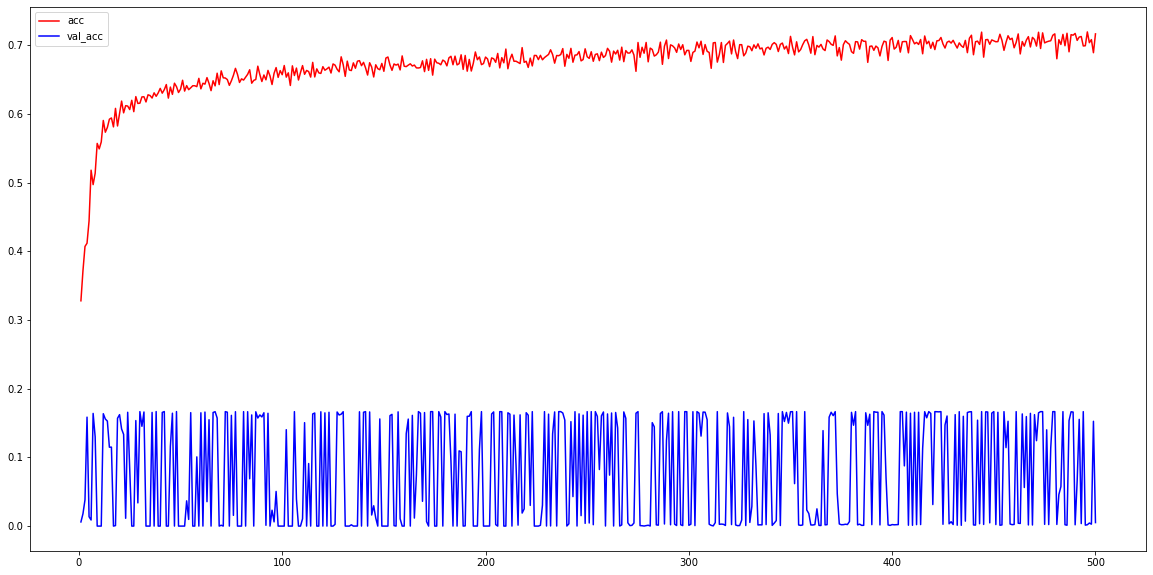

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
epochs = range(1,500+1)
plt.plot(epochs,history.history['accuracy'],'r',label='acc')
plt.plot(epochs,history.history['val_accuracy'],'b',label = 'val_acc')
plt.legend()

In [12]:
model.evaluate(test_data,test_label)

250/250 [==============================] - 0s 1ms/step - loss: 1125.9004 - accuracy: 0.5064


[1125.900390625, 0.5063750147819519]